<a href="https://colab.research.google.com/github/omid-sar/Interview-Preparation/blob/main/ML_interview/ML_int_twitter_toxic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/omid-sar/Project_Data_Hub/main/twitter_toxic_final_balanced_dataset.csv

--2024-05-08 21:30:12--  https://raw.githubusercontent.com/omid-sar/Project_Data_Hub/main/twitter_toxic_final_balanced_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5518854 (5.3M) [text/plain]
Saving to: ‘twitter_toxic_final_balanced_dataset.csv’

twitter_toxic_final 100%[===================>]   5.26M  --.-KB/s    in 0.08s   

2024-05-08 21:30:12 (63.7 MB/s) - ‘twitter_toxic_final_balanced_dataset.csv’ saved [5518854/5518854]



In [3]:
import pandas as pd
df_org = pd.read_csv("twitter_toxic_final_balanced_dataset.csv", usecols=["Toxicity", "tweet"])
df_org.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [4]:
for _ in range(10):
  rand = np.random.randint(len(df_org))
  print(df_org.iloc[rand]["tweet"], df_org.iloc[rand]["Toxicity"])

@user @user [ok we are so cool hyung]   0
I need sum hoes ah sum, cuz I wake up all I have is hella emails &#128557;&#128299; but not a Goodmoring or goodnight text. Shit not even a single text &#9995;&#128529; 1
Not about to play these games with this bitch 1
RT @Gvmby: This bitch possessed by the thot demon. https://t.co/FHfgbsihhE 1
#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   0
RT @DivaMonRoe2uHoE: Niggas always wanna talk about how God is against gays.. What about that pussy you was eating last night? Ain't God ag&#8230; 1
When I die
Throw a couple bad bitches in my casket 1
This. Good. #pricklypear #shiner http://t.co/clfJKT4IZ4 0
tonight: doctor faustus at @user    0
mood. ðð¤ððð»ðð #friday #weekend #vibes #keen #mood #thislife #loveit #dog #cheesy #smile  â¦  0


MAX LENGTH: 754


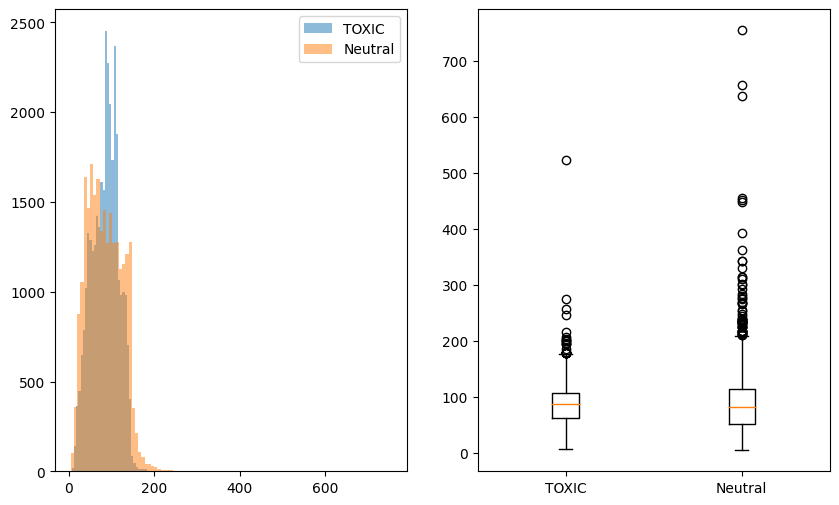

In [5]:
import matplotlib.pyplot as plt

df = df_org.copy()

df["tweet_len"] = [len(seq) for seq in df_org["tweet"]]
toxic_len = df[df["Toxicity"] == 0]["tweet_len"]
norm_len = df[df["Toxicity"] == 1]["tweet_len"]

print("MAX LENGTH:" ,max(df["tweet_len"]))

fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
ax1.hist(toxic_len, bins=100, alpha=0.5, label="TOXIC")
ax1.hist(norm_len, bins=100, alpha=0.5, label="Neutral")
ax1.legend()

ax2.boxplot([toxic_len, norm_len], labels=["TOXIC", "Neutral"])
plt.show()


In [6]:
# The most part of twwet lenghts are less than 200, so we cut them to reduce computation perpelixity
df = df[df["tweet_len"] <= 200].drop("tweet_len", axis=1)
X = df["tweet"].values
y = df["Toxicity"].values
sequences = [sequence for sequence in X]

In [7]:
from transformers import DistilBertTokenizer, BertTokenizer

distilled_tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [14]:
model_inputs = tokenizer(sequences, padding=True, return_tensors='pt')
model_inputs

input_ids: 
 tensor([  101,  1030,  5310,  2043,  1037,  2269,  2003, 28466,  2389,  1998,
         2003,  2061, 14337,  2002,  8011,  2015,  2010,  4268,  2046,  2010,
        28466,  1012,  1001,  2448,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0]) 
 token_type_ids: 
 torch.Size([119]) 
 attention_mask: 


{'input_ids': tensor([[  101,  1030,  5310,  ...,     0,     0,     0],
        [  101,  1030,  5310,  ...,     0,     0,     0],
        [  101, 12170, 14945,  ...,     0,     0,     0],
        ...,
        [  101,  2402, 10131,  ...,     0,     0,     0],
        [  101,  2017,  2226,  ...,     0,     0,     0],
        [  101,  1066,  1066,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [22]:
print("tweet: \n " , sequences[0],
      "\n input_ids: \n",  model_inputs.input_ids[0],
      "\n token_type_ids: \n" , model_inputs.token_type_ids[0],
      "\n attention_mask: \n" , model_inputs.attention_mask[0])

tweet: 
   @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 
 input_ids: 
 tensor([  101,  1030,  5310,  2043,  1037,  2269,  2003, 28466,  2389,  1998,
         2003,  2061, 14337,  2002,  8011,  2015,  2010,  4268,  2046,  2010,
        28466,  1012,  1001,  2448,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,

In [10]:
import torch
from torch.utils.data import DataLoader, TensorDataset

labels = torch.tensor(y)
dataset = TensorDataset(model_inputs["input_ids"], model_inputs["attention_mask"], labels)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4 , pin_memory=True)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [11]:
from torch.utils.data import random_split

train_size = int(len(dataset)* 0.7)
val_size = int(len(dataset)* 0.2)
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [12]:
len(distilled_tokenizer.get_vocab())

30522

In [13]:
import torch.nn as nn


class LSTM(nn.Module):

  def __init__(self, input_size, embedding):
    super(LSTM, self).__init__()
    self.input_size = input_size
    self.embedding = nn.Embedding(num_embeddings=, embedding_dim=)
    self.lstm = nn.LSTM
